1. Load dataset from - https://covid.ourworldindata.org/data/owid-covid-data.csv 

2. Subset only those rows that have “India” in the “location” column(This subsetted dataframe has to be used for modelling) 

3. Univariate Analysis: 
       a. Draw histograms of each numerical variable 
       b. Find mean, median and mode of each column 

4. Bivariate Analysis: 
       a. Draw scatter plots of each numerical column versus one another 
       b. Draw line plots of each numerical column versus one another 

5. Handle Missing values:   
       a. If there are null values in numerical column, replace the null values by the mean of that column  
       b. If there are null values in categorical column, replace the null values by the mode of that column 
       c. If more than 50%the values in a column are null, then drop that entire column 

6. Convert date column to ordinal 
       a. Code: import datetime as dt 
                df["date"]=pd.to_datetime(df["date"]) 
                df["date"]=df["date"].map(dt.datetime.toordinal)

7. Drop all categorical columns 

8. Select “total_cases” column as the target variable 

9. Select the other columns as the features(the “date” column has to be in the features) 

10. Perform train-test split 

11. Modelling: 
        a. Linear Regression 
        b. Random Forest Regressor 

12. Get accuracy 

13. Predict Total case for a new date 

NOTE: To convert anytime back from ordinal to date-time use the following sample code: from datetime import datetime ordinal value = 733828 # This is an example

In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading dataset
df_covid = pd.read_csv('owid-covid-data.csv')

In [3]:
#Let's check how the data is distributed
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


From the first 5 lines of the dataset I already got some null values. So I have to remove the null values in the dataset. Before that I have to separate the dataset where the location is India.

In [4]:
# df_covid.tail()

In [5]:
# df_covid.shape

In [6]:
# df_covid.columns

In [7]:
#Information about the data columns
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30431 entries, 0 to 30430
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         30367 non-null  object 
 1   continent                        30169 non-null  object 
 2   location                         30431 non-null  object 
 3   date                             30431 non-null  object 
 4   total_cases                      30120 non-null  float64
 5   new_cases                        30120 non-null  float64
 6   total_deaths                     30120 non-null  float64
 7   new_deaths                       30120 non-null  float64
 8   total_cases_per_million          30056 non-null  float64
 9   new_cases_per_million            30056 non-null  float64
 10  total_deaths_per_million         30056 non-null  float64
 11  new_deaths_per_million           30056 non-null  float64
 12  total_tests       

The dataset have many null values. Categorial columns are also present. 

In [8]:
# Information on the Dataset
df_covid.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,3.012000e+04,30120.000000,30120.000000,30120.000000,30056.000000,30056.000000,30056.000000,30056.000000,9.243000e+03,8844.000000,...,27283.000000,27101.000000,18132.000000,27447.000000,28357.000000,21872.000000,21614.000000,12476.000000,25012.000000,30007.000000
mean,4.184206e+04,883.078552,2336.914276,38.400996,957.103251,16.562589,37.136255,0.523218,6.433078e+05,15527.596789,...,6.030306,21734.842082,11.284210,248.995017,8.037692,11.039211,32.642025,53.538346,3.158227,74.311094
std,4.216805e+05,7980.670278,22456.306856,337.512278,2399.404591,62.374698,118.443085,2.963908,2.505799e+06,53808.953268,...,4.377218,20778.647593,18.568924,118.165279,4.105816,10.516487,13.324101,31.386613,2.558645,7.295529
min,0.000000e+00,-29726.000000,0.000000,-1918.000000,0.000000,-437.881000,0.000000,-41.023000,1.000000e+00,-3743.000000,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,1.800000e+01,0.000000,0.000000,0.000000,6.103000,0.000000,0.000000,0.000000,2.249100e+04,824.000000,...,2.171000,6171.884000,0.500000,152.783000,5.310000,1.900000,21.400000,22.863000,1.380000,70.600000
50%,3.350000e+02,5.000000,7.000000,0.000000,116.360500,0.639500,1.498000,0.000000,9.734000e+04,2767.500000,...,4.458000,15308.712000,1.700000,235.954000,7.110000,6.900000,31.400000,59.550000,2.540000,75.860000
75%,3.932500e+03,85.000000,86.000000,2.000000,738.831000,9.449000,17.086250,0.118000,3.763960e+05,9121.500000,...,9.720000,33132.320000,14.800000,317.840000,10.080000,19.600000,40.900000,83.741000,4.210000,80.180000
max,1.329916e+07,230051.000000,578319.000000,10489.000000,36282.826000,4944.376000,1237.551000,200.040000,4.028218e+07,823375.000000,...,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


In [9]:
#Checking Null values on the dataset
df_covid.isnull().sum()

iso_code                              64
continent                            262
location                               0
date                                   0
total_cases                          311
new_cases                            311
total_deaths                         311
new_deaths                           311
total_cases_per_million              375
new_cases_per_million                375
total_deaths_per_million             375
new_deaths_per_million               375
total_tests                        21188
new_tests                          21587
total_tests_per_thousand           21188
new_tests_per_thousand             21587
new_tests_smoothed                 20390
new_tests_smoothed_per_thousand    20390
tests_units                        19695
stringency_index                    5810
population                            64
population_density                  1352
median_age                          3007
aged_65_older                       3400
aged_70_older   

The null values in the whole dataset are listed above.

Now we have to separete the data where the location is India. We will do the analysis in future on the indian dataset.

In [10]:
# Subsetting those rows where location is India
df=df_covid[df_covid["location"]=="India"]

In [11]:
# Let's check the new dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12708,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12709,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12710,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12711,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12712,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [12]:
# df.tail()

In [13]:
# df.shape

In [14]:
# Information about the new Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 12708 to 12904
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         197 non-null    object 
 1   continent                        197 non-null    object 
 2   location                         197 non-null    object 
 3   date                             197 non-null    object 
 4   total_cases                      197 non-null    float64
 5   new_cases                        197 non-null    float64
 6   total_deaths                     197 non-null    float64
 7   new_deaths                       197 non-null    float64
 8   total_cases_per_million          197 non-null    float64
 9   new_cases_per_million            197 non-null    float64
 10  total_deaths_per_million         197 non-null    float64
 11  new_deaths_per_million           197 non-null    float64
 12  total_tests     

Here Null values are present on the dataset. Here the categorical columns also have null values so we have to replace them by the mode of that column. And for the numerical columns the Null values must be replaced by the mean.

In [15]:
# More information on the new dataset
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.110000e+02,105.000000,...,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,127764.644670,4752.187817,3722.492386,123.395939,92.582726,3.443609,2.697457,0.089406,3.523086e+06,111155.885714,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
std,223896.756462,7482.086884,6350.676644,211.699984,162.243537,5.421787,4.601924,0.153363,3.468878e+06,78013.256672,...,9.794854e-15,2.005986e-11,7.479707e-14,7.408472e-13,4.452206e-14,4.452206e-15,6.411177e-14,1.282235e-13,8.904413e-16,1.139765e-13
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000e+03,157.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
25%,3.000000,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,4.321035e+05,41247.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
50%,5194.000000,678.000000,149.000000,23.000000,3.764000,0.491000,0.108000,0.017000,2.404267e+06,101475.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
75%,151767.000000,6767.000000,4337.000000,175.000000,109.976000,4.904000,3.143000,0.127000,5.847601e+06,151808.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
max,936181.000000,29429.000000,24309.000000,2003.000000,678.390000,21.325000,17.615000,1.451000,1.180626e+07,283659.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01


In [16]:
#Checking Null values on the new dataset
df.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
total_deaths                        0
new_deaths                          0
total_cases_per_million             0
new_cases_per_million               0
total_deaths_per_million            0
new_deaths_per_million              0
total_tests                        86
new_tests                          92
total_tests_per_thousand           86
new_tests_per_thousand             92
new_tests_smoothed                 81
new_tests_smoothed_per_thousand    81
tests_units                        74
stringency_index                    6
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
extreme_pove

The Null values on the new dataset are listed above.

In [17]:
# To check for number of columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [18]:
# Defining a variable cols 
cols=['total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']

Now we are going to plot the histogram for all numerical column. The numerical columns are listed above in a variable named cols. Here we will do univariate analysis that mean we will draw histograms on each columns.

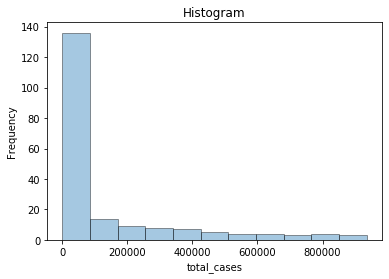

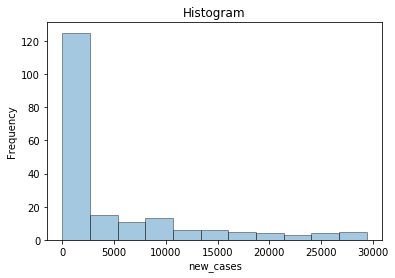

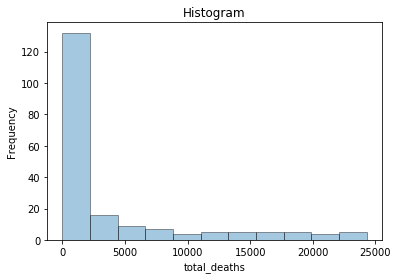

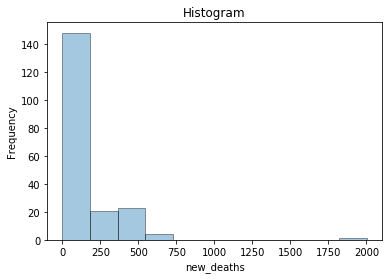

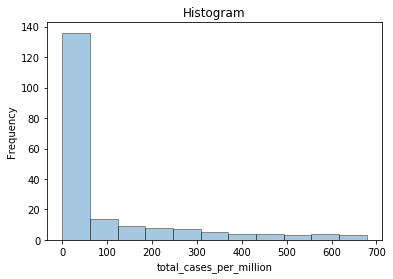

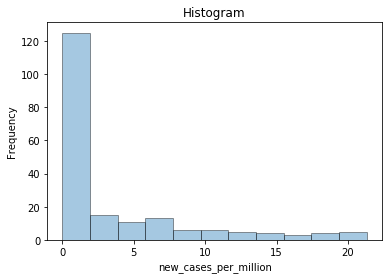

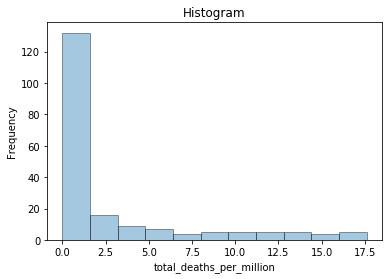

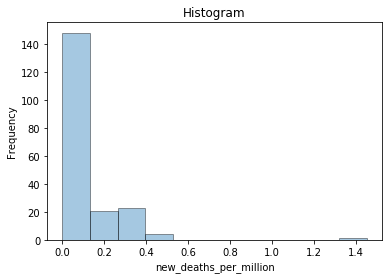

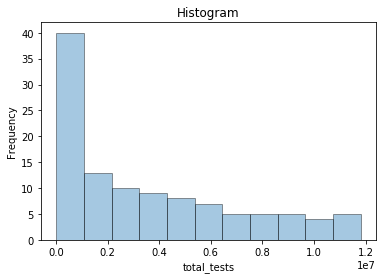

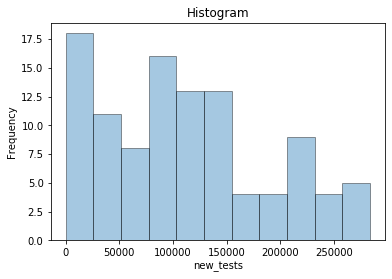

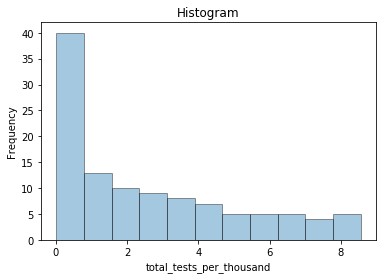

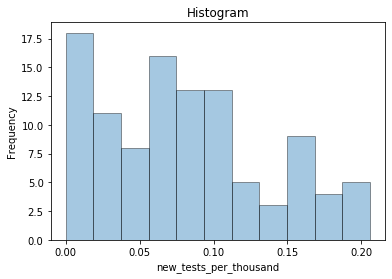

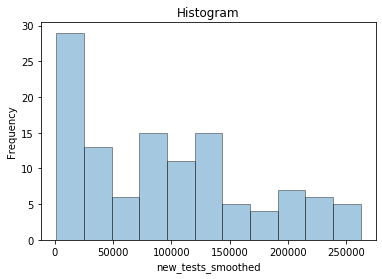

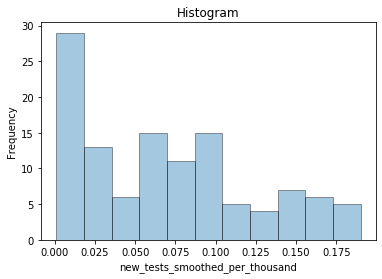

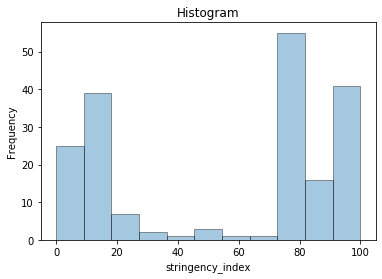

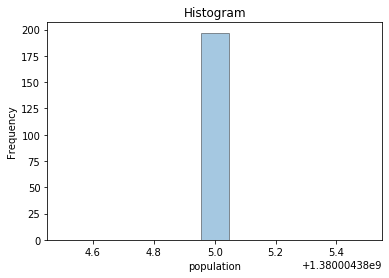

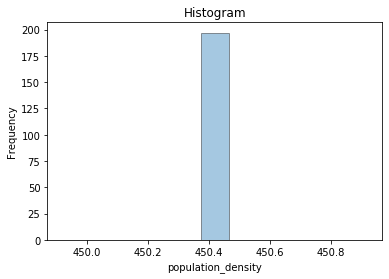

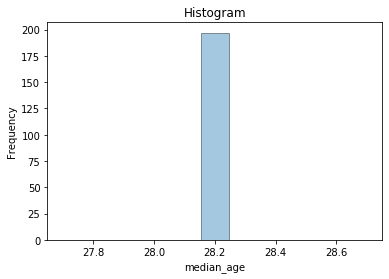

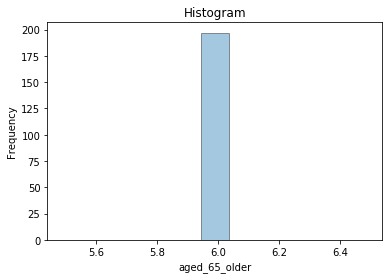

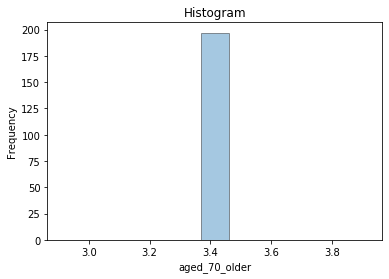

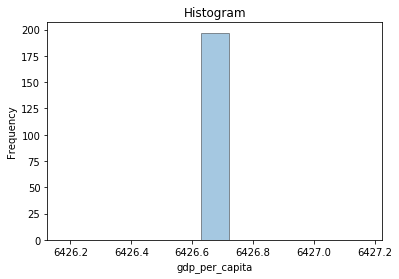

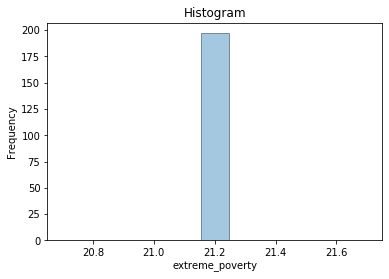

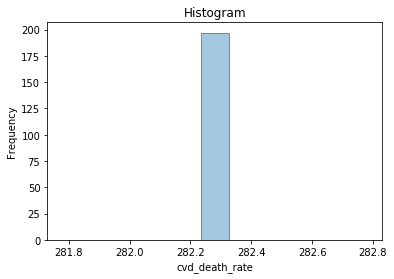

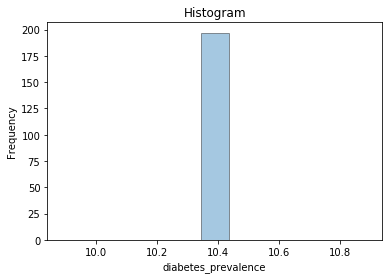

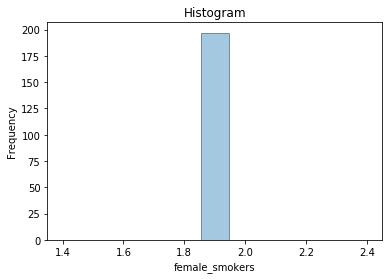

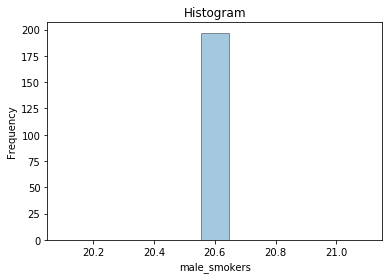

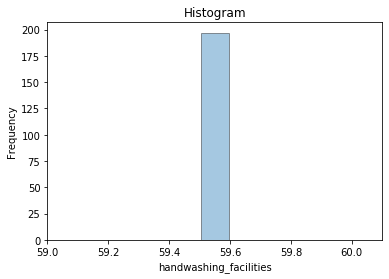

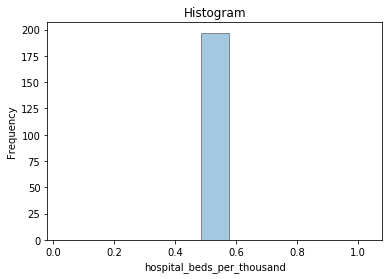

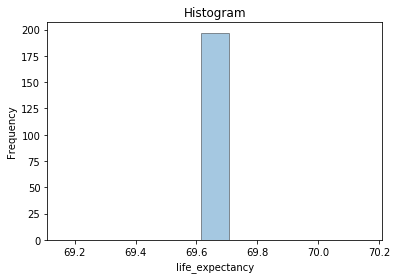

In [19]:
#Plotting Histograms
for i in cols:
  sns.distplot(df[i],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="k", linewidth=1))
  plt.title("Histogram")
  plt.ylabel("Frequency")
  plt.show()

From these histograms we observe that the columns new_deaths , new_deaths_per_million consists of outliers . So we have to remove the outliers before making prediction on the model.

In [20]:
#Plotting Boxplots

# for i in cols:
#   sns.boxplot(y=i, data = df)
#   #sns.boxplot(y=i, data = df)
#   plt.title("Boxplot 11")
#   plt.show()

Now calculating the mean median mode of the new dataset.

In [21]:
# Checking the mean of each column in the new dataset
df.mean()

total_cases                        1.277646e+05
new_cases                          4.752188e+03
total_deaths                       3.722492e+03
new_deaths                         1.233959e+02
total_cases_per_million            9.258273e+01
new_cases_per_million              3.443609e+00
total_deaths_per_million           2.697457e+00
new_deaths_per_million             8.940609e-02
total_tests                        3.523086e+06
new_tests                          1.111559e+05
total_tests_per_thousand           2.552982e+00
new_tests_per_thousand             8.054286e-02
new_tests_smoothed                 9.492413e+04
new_tests_smoothed_per_thousand    6.878448e-02
stringency_index                   5.530901e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820000e+01
aged_65_older                      5.989000e+00
aged_70_older                      3.414000e+00
gdp_per_capita                     6.426

In [22]:
# Checking the median of each column in the new dataset
df.median()

total_cases                        5.194000e+03
new_cases                          6.780000e+02
total_deaths                       1.490000e+02
new_deaths                         2.300000e+01
total_cases_per_million            3.764000e+00
new_cases_per_million              4.910000e-01
total_deaths_per_million           1.080000e-01
new_deaths_per_million             1.700000e-02
total_tests                        2.404267e+06
new_tests                          1.014750e+05
total_tests_per_thousand           1.742000e+00
new_tests_per_thousand             7.400000e-02
new_tests_smoothed                 8.783350e+04
new_tests_smoothed_per_thousand    6.350000e-02
stringency_index                   7.546000e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820000e+01
aged_65_older                      5.989000e+00
aged_70_older                      3.414000e+00
gdp_per_capita                     6.426

In [23]:
# Checking the mode of each column in the new dataset
df.mode()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,NaN,NaN,NaN,2020-07-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,2020-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,NaN,NaN,2020-07-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,2020-07-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#sns.pairplot(df)

In [25]:
# Plotting ScatterPlots

# for i in cols:
#   for j in reversed(cols):
#     sns.scatterplot(x=i, y=j, data=df)
#     plt.title("Scatter Plot")
#     plt.show()

Now we are going to plot Scatterplots as well as lineplots for the new dataset.Here we are going to use bivariate analysis. We are going to separate the target column from the other numerical columns. And then do the analysis on the target columns versus numerical columns

In [26]:
# Defining  new variables for cols 
cols=[ 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']

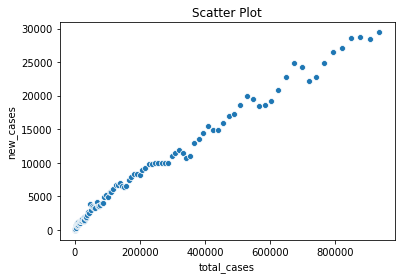

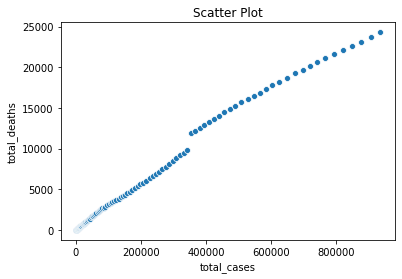

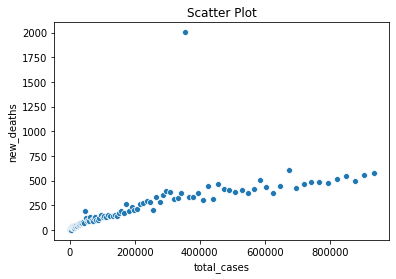

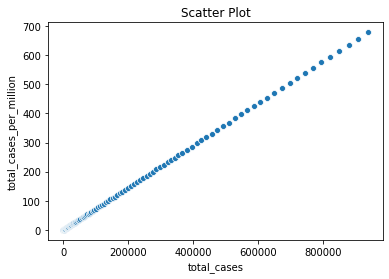

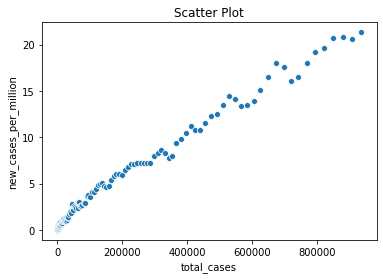

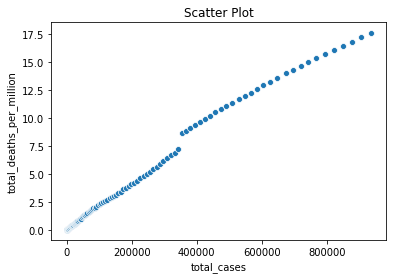

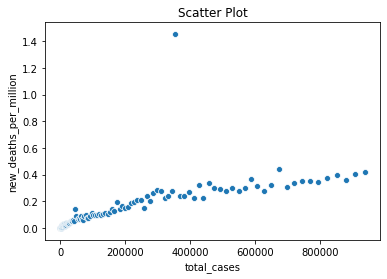

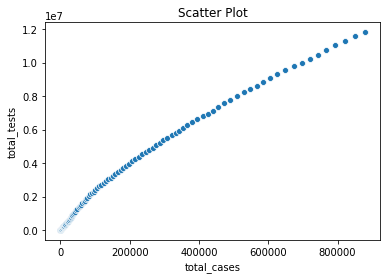

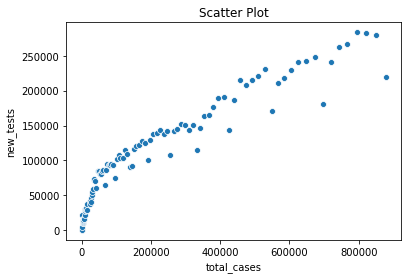

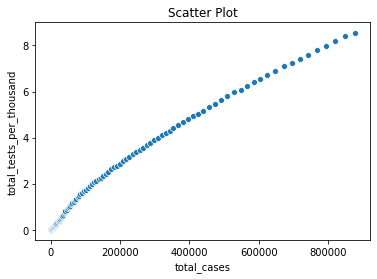

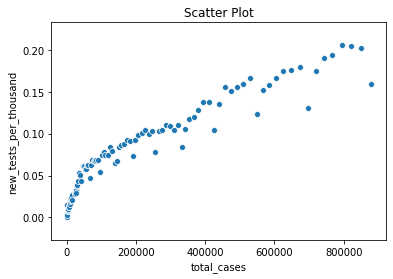

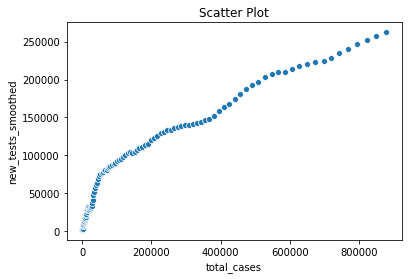

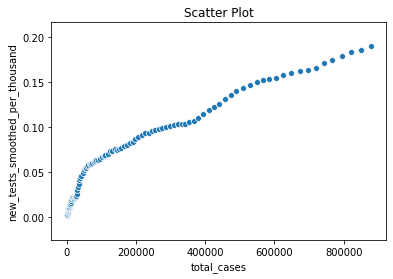

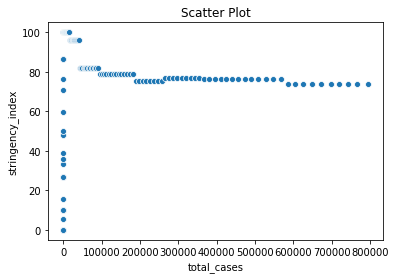

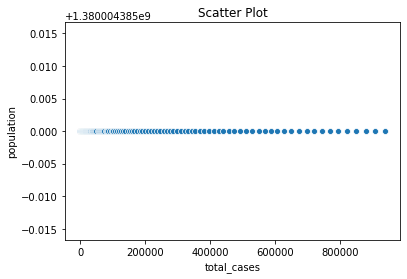

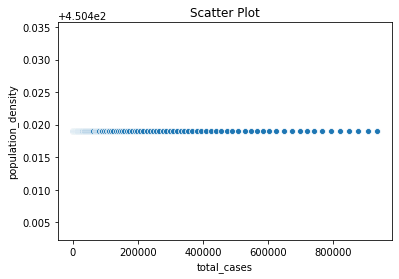

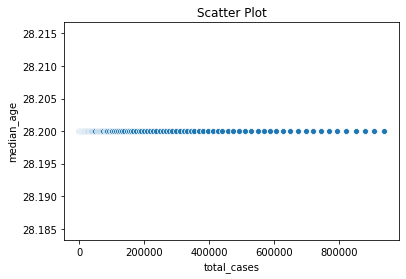

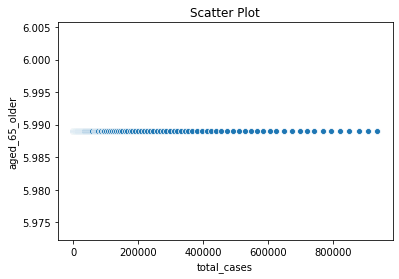

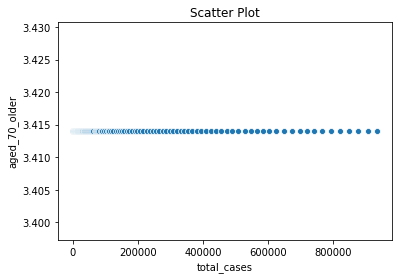

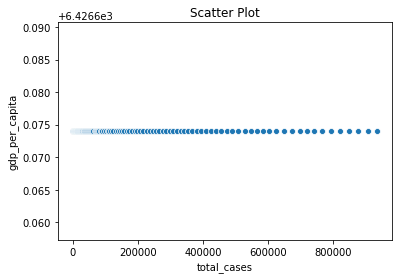

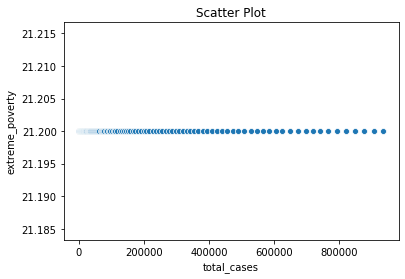

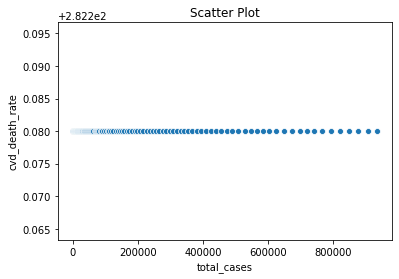

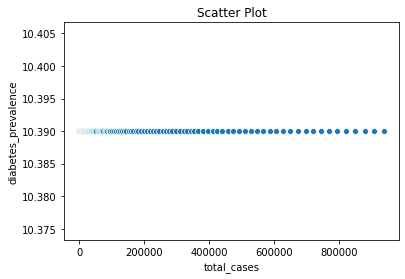

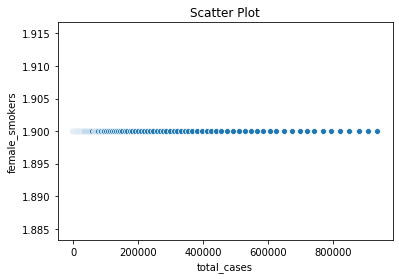

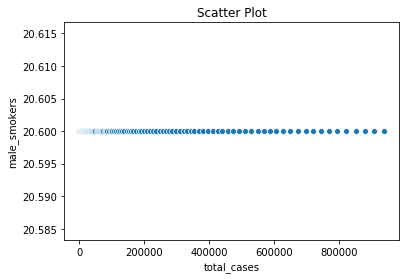

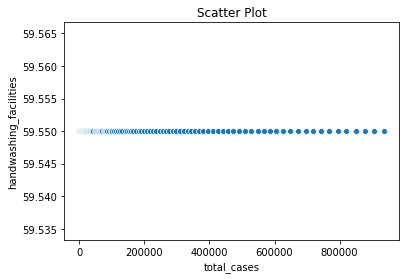

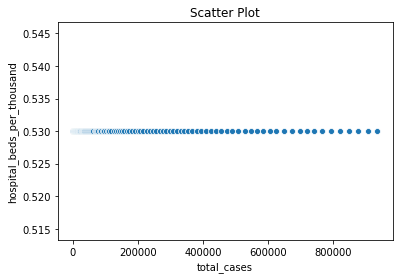

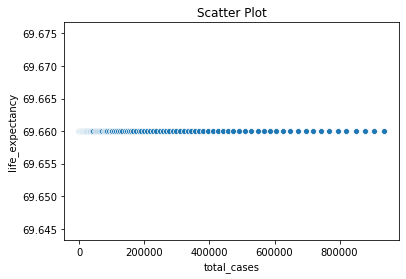

In [27]:
# Plotting ScatterPlots
for i in cols:
    sns.scatterplot(x='total_cases', y=i, data=df)
    plt.title("Scatter Plot")
    plt.show()

In [28]:
#Plotting Lineplots

# for i in cols:
#   for j in reversed(cols):
#     sns.lineplot(x=i,y=j,data=df)
#     plt.title("Line Plots")
#     plt.show()

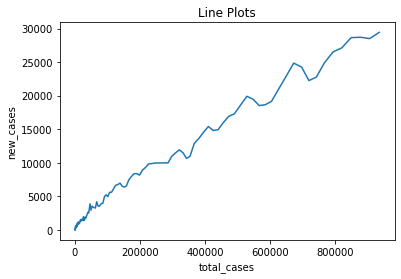

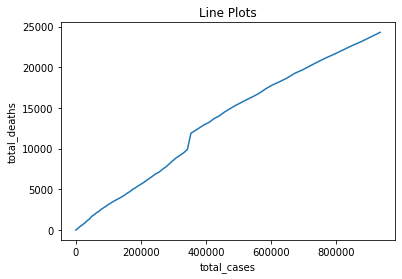

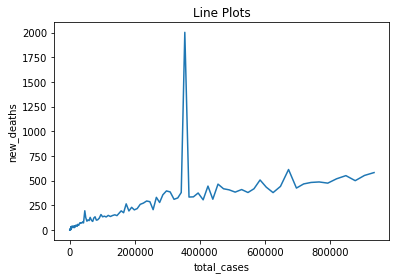

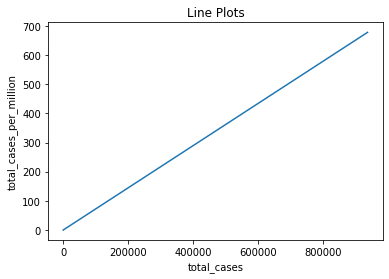

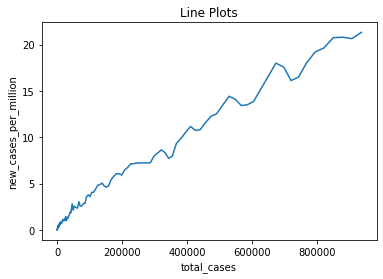

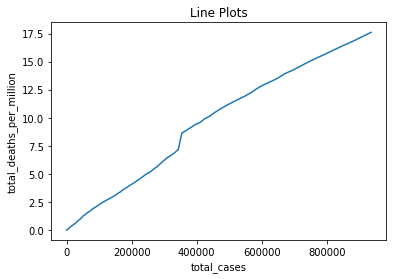

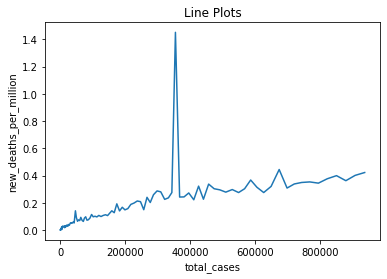

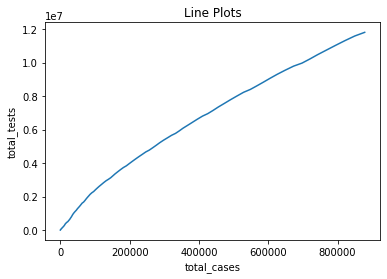

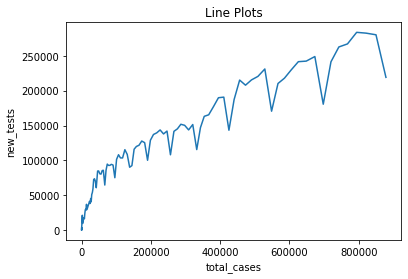

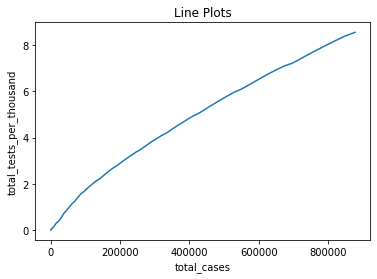

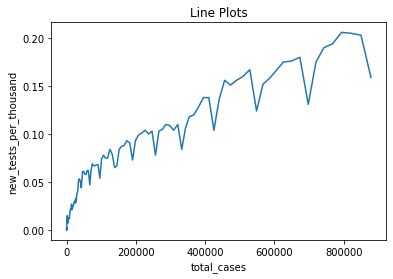

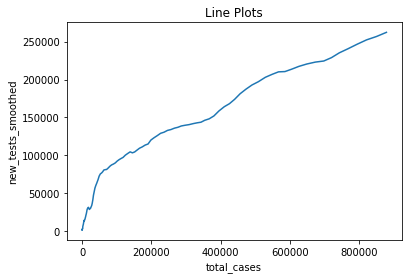

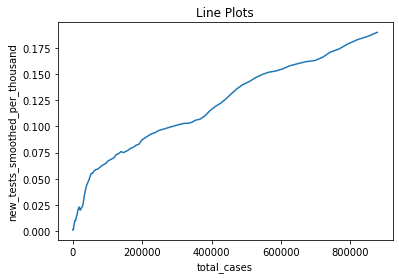

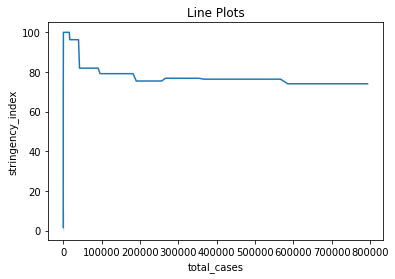

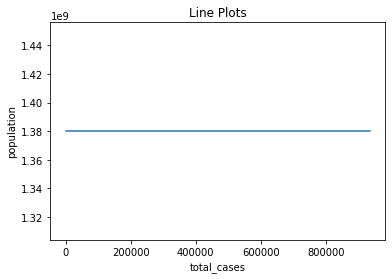

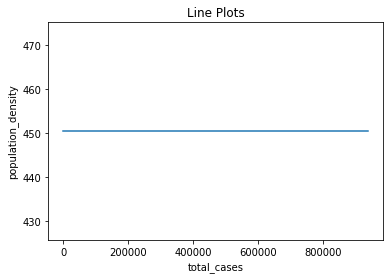

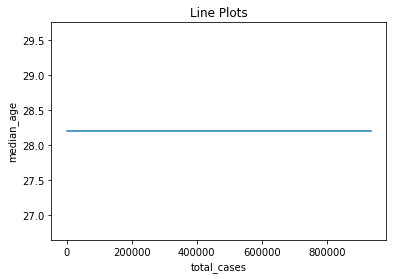

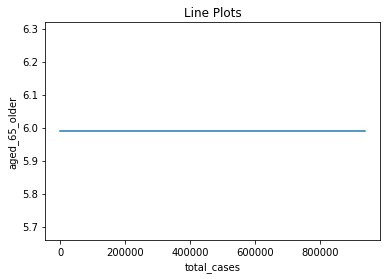

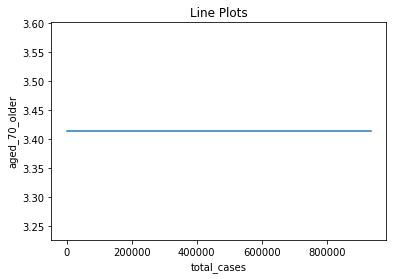

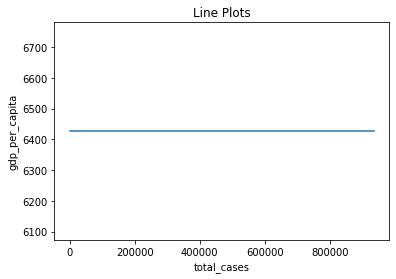

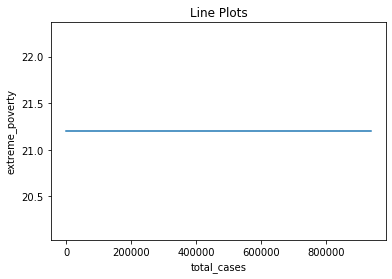

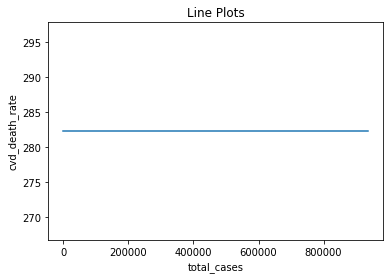

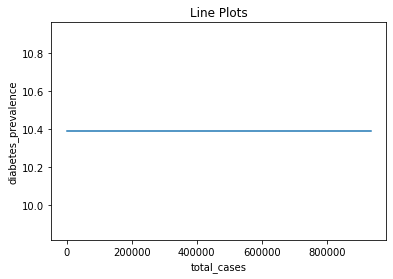

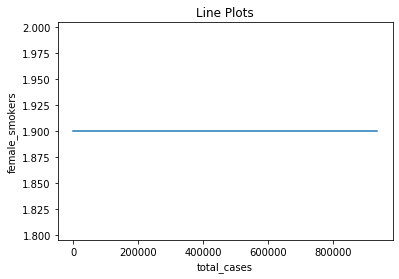

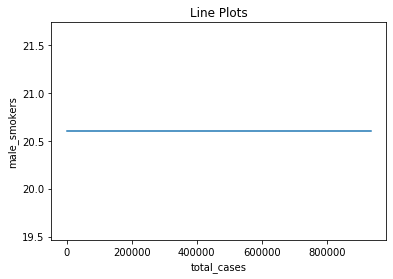

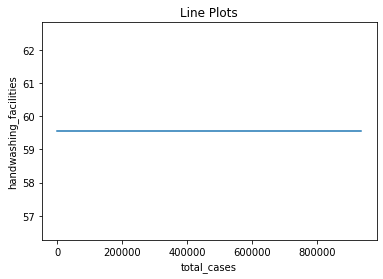

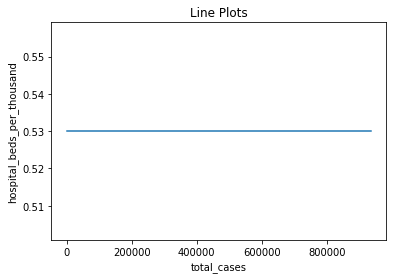

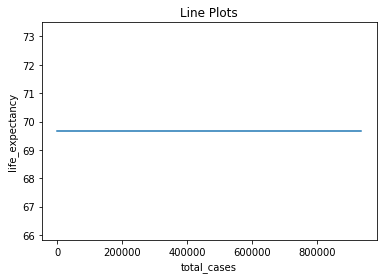

In [29]:
# Plotting Lineplots
for i in cols:
    sns.lineplot(x='total_cases',y=i,data=df)
    plt.title("Line Plots")
    plt.show()

So from the previously plotted histograms we observed that outliers are present on the new dataset. And when we observe the dataset carefully we will observe that most of the outliers are mainly present on the 168 row of the dataset . So we will drop that entire row to make better prediction and more accuracy on the model.

In [30]:
# Removing outliers in the dataset
df.drop(df.index[168],inplace=True)

C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
# Checking the info once again
# df.info

In [32]:
# Observe the changes after removing outliers
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,1.100000e+02,104.000000,...,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,126610.051020,4720.443878,3680.755102,113.806122,91.746066,3.420607,2.667214,0.082459,3.499802e+06,110655.586538,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
std,223881.371345,7487.935555,6339.793839,163.819360,162.232388,5.426025,4.594040,0.118680,3.476029e+06,78221.606192,...,9.349755e-15,1.914830e-11,7.479804e-14,7.408568e-13,4.452264e-14,4.452264e-15,6.411261e-14,1.211016e-13,8.904529e-16,1.139780e-13
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000e+03,157.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
25%,3.000000,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,4.168448e+05,41062.750000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
50%,4807.500000,639.500000,131.500000,20.000000,3.484000,0.463500,0.095500,0.014500,2.353530e+06,100827.500000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
75%,146976.750000,6682.250000,4209.500000,171.250000,106.504250,4.842500,3.050750,0.124000,5.745253e+06,151526.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
max,936181.000000,29429.000000,24309.000000,613.000000,678.390000,21.325000,17.615000,0.444000,1.180626e+07,283659.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01


Now after removing the outliers we have to remove the null values also .So we will replace the null values of the numerical columns by the mean and for the categorical by the mode.

In [33]:
# Replacing the null values with the mean of the columns
#df.fillna(df.mean(), inplace=True)
df=df.fillna(df.mean())

In [34]:
# Replacing the null categorical columns with their mode
df['tests_units'].fillna(df['tests_units'].mode()[0],inplace=True)

In [35]:
# Now there are no Null values in the Dataset
#df.info()
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
total_tests                        0
new_tests                          0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_units                        0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
c

Now we have cleaned the dataset properly. And the next task will be to convert the date column to ordinal.

In [36]:
# Convert date column to ordinal
import datetime as dt 
df["date"]=pd.to_datetime(df["date"]) 
df["date"]=df["date"].map(dt.datetime.toordinal)

In [37]:
# Date column was changed to ordinal
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12708,IND,Asia,India,737424,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12709,IND,Asia,India,737425,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12710,IND,Asia,India,737426,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12711,IND,Asia,India,737427,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12712,IND,Asia,India,737428,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


Now we have to drop the categorical columns 'iso_code', 'continent' , 'location' , 'tests_units' .

In [38]:
# Droping the categorical columns to prepare the dataset for training
df.drop(['iso_code', 'continent','location','tests_units'], axis=1, inplace=True)
df.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12708,737424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12709,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12710,737426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12711,737427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12712,737428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


Now we are prepairing the model for training . For that we are creating the feature and the response variable. Next we will train the model using LinearRegression and RandomForestRegressor as mentioned in the project.

In [39]:
# Create arrays for the features and the response variable
y = df["total_cases"].values
X = df.drop(["total_cases"],axis=1).values

In [40]:
# Train and Test splitting of data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [41]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the regressor: reg
reg= LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred=reg.predict(X_test)

#Score the model
reg.score(X_test,y_test)

0.9999999999982944

From the LinearRegression classifier we get a accuracy score of 99.99% and that was quiet good for a model .For a buisness model a accuracy percentage of more than 80% is good . So the accuracy score is quiet good for these model.

In [42]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.9999999999982944
Root Mean Squared Error: 0.35114644816412


The Root Mean Squared Error for these model is also very less which is  0.35 .

In [43]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor()
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Predict on the test data: y_pred
y_pred=rf.predict(X_test)

#Score the model
rf.score(X_test,y_test)

0.9810407387123958

The accuracy score for these model is 98.1% which is also a very good . Although the accuracy score is less than the LinearRegression model.

Now we are going to predict the model for a new data provided by us as instructed in the project. We will predict the new data on both the model Linear regression and RandomForestRegressor.

In [44]:
#Predict total cases for a new data through Linear regression
reg.predict([[733828,10974,11903,2003,256.568,7.952,8.625,1.451,6084256,163187,4.409,0.118,146132,0.106,76.85,1.38e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66]])

array([354050.17355461])

In [45]:
#Predict total cases for a new data through RandomForestRegressor
rf.predict([[733828,10974,11903,2003,256.568,7.952,8.625,1.451,6084256,163187,4.409,0.118,146132,0.106,76.85,1.38e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66]])

array([351793.82])

In these model we observed that the accuracy for the Linear regression is 99.99%  and for the RandomForestRegressor accuracy is 98.1% which is also very much . So both the Linear regression and RandomForestRegressor shows better performance. So the Linear regression is much better than the RandomForestRegressor in these dataset.